In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from sklearn.linear_model import LinearRegression
import scipy

In [2]:
data_raw = pd.read_excel('RawData.xlsx', index_col=0, na_values='NA')
data_raw.head()

,№№ скважин,Пласт,Фация,"Верх интервала отбора, м","Низ интервала отбора, м","Вынос керна,м","Место взятия от верха, м",Лабораторный номер образца,Краткая литологическая характеристика,"Открытая пористость по воде, %",...,"Газопроницаемость перпендикулярно напластованию, мД","Эффективная проницаемость, мД","Водоудерживающая способность, %","Остаточная водонасыщенность, %","Объемная плотность, г/см3","Кажущаяся минералогическая плотность, г/см3","Потеря веса, %","Глубина отбора образца после привязки к ГИС, м","Смещение, м",Примечание
№ п/п,,,,,,,,,,,,,,,,,,,,,
0,1,MО10-0,NaN,2465.0,2472.0,7.0,0.17,46542-08,"Аргиллит алевритистый до тонкоотмученного, с м...",NaN,...,NaN,NaN,NaN,NaN,2.510000,2.698925,NaN,2464.97,0.2,кусок
1,1,MО10-0,NaN,2465.0,2472.0,7.0,2.34,46541-08,"Аргиллит алевритистый до тонкоотмученного, с м...",NaN,...,NaN,NaN,NaN,NaN,2.490000,2.697725,NaN,2467.14,0.2,кусок
2,1,MО10-0,NaN,2465.0,2472.0,7.0,2.58,46540-08,"Аргиллит алевритистый до тонкоотмученного, с м...",NaN,...,NaN,NaN,NaN,NaN,2.480000,2.672414,NaN,2467.38,0.2,кусок
3,1,MО10-0,NaN,2465.0,2472.0,7.0,2.68,46539-08,"Аргиллит алевритистый до тонкоотмученного, с м...",NaN,...,NaN,NaN,NaN,NaN,2.480000,2.689805,NaN,2467.48,0.2,кусок
4,1,MО12.1,мелководье,2465.0,2472.0,7.0,3.30,46538-08,"Песчаник мелкозернистый, карбонатный, неравном...",9.031357,...,NaN,NaN,95.604445,NaN,2.440524,2.682819,NaN,2468.10,0.2,NaN


In [3]:
categorical_columns=['№№ скважин', 'Пласт', 'Фация', 'Лабораторный номер образца',
                            'Краткая  литологическая характеристика','Примечание']

In [4]:
numerical_columns=['Верх интервала отбора, м','Низ интервала отбора, м',
                          'Вынос керна,м', 'Место взятия от верха, м ', 
                          'Открытая пористость по воде, %', 'Открытая пористость по керосину,%',
                          'Эффективная пористость ,%', 'Газопроницаемость параллельно напластованию , мД',
                          'Газопроницаемость перпендикулярно напластованию, мД',
                          'Эффективная проницаемость, мД', 'Водоудерживающая способность, %',
                          'Остаточная водонасыщенность, %', 'Объемная плотность, г/см3',
                          'Кажущаяся минералогическая плотность, г/см3', 'Потеря веса, %',
                          'Глубина отбора образца после привязки к ГИС, м', 'Смещение, м']

In [5]:
main_data = data_raw[['№№ скважин', 'Пласт', 'Фация','Примечание', 
                      'Открытая пористость по воде, %', 'Открытая пористость по керосину,%', 
                      'Газопроницаемость параллельно напластованию , мД',
                      'Водоудерживающая способность, %', 'Остаточная водонасыщенность, %',
                      'Объемная плотность, г/см3']]

In [6]:
main_data_n=data_raw[['Открытая пористость по воде, %', 'Открытая пористость по керосину,%',
                      'Водоудерживающая способность, %', 'Остаточная водонасыщенность, %',
                      'Объемная плотность, г/см3',  'Газопроницаемость параллельно напластованию , мД']]

In [7]:
main_data_d = data_raw[['№№ скважин', 'Пласт', 'Фация','Примечание']]

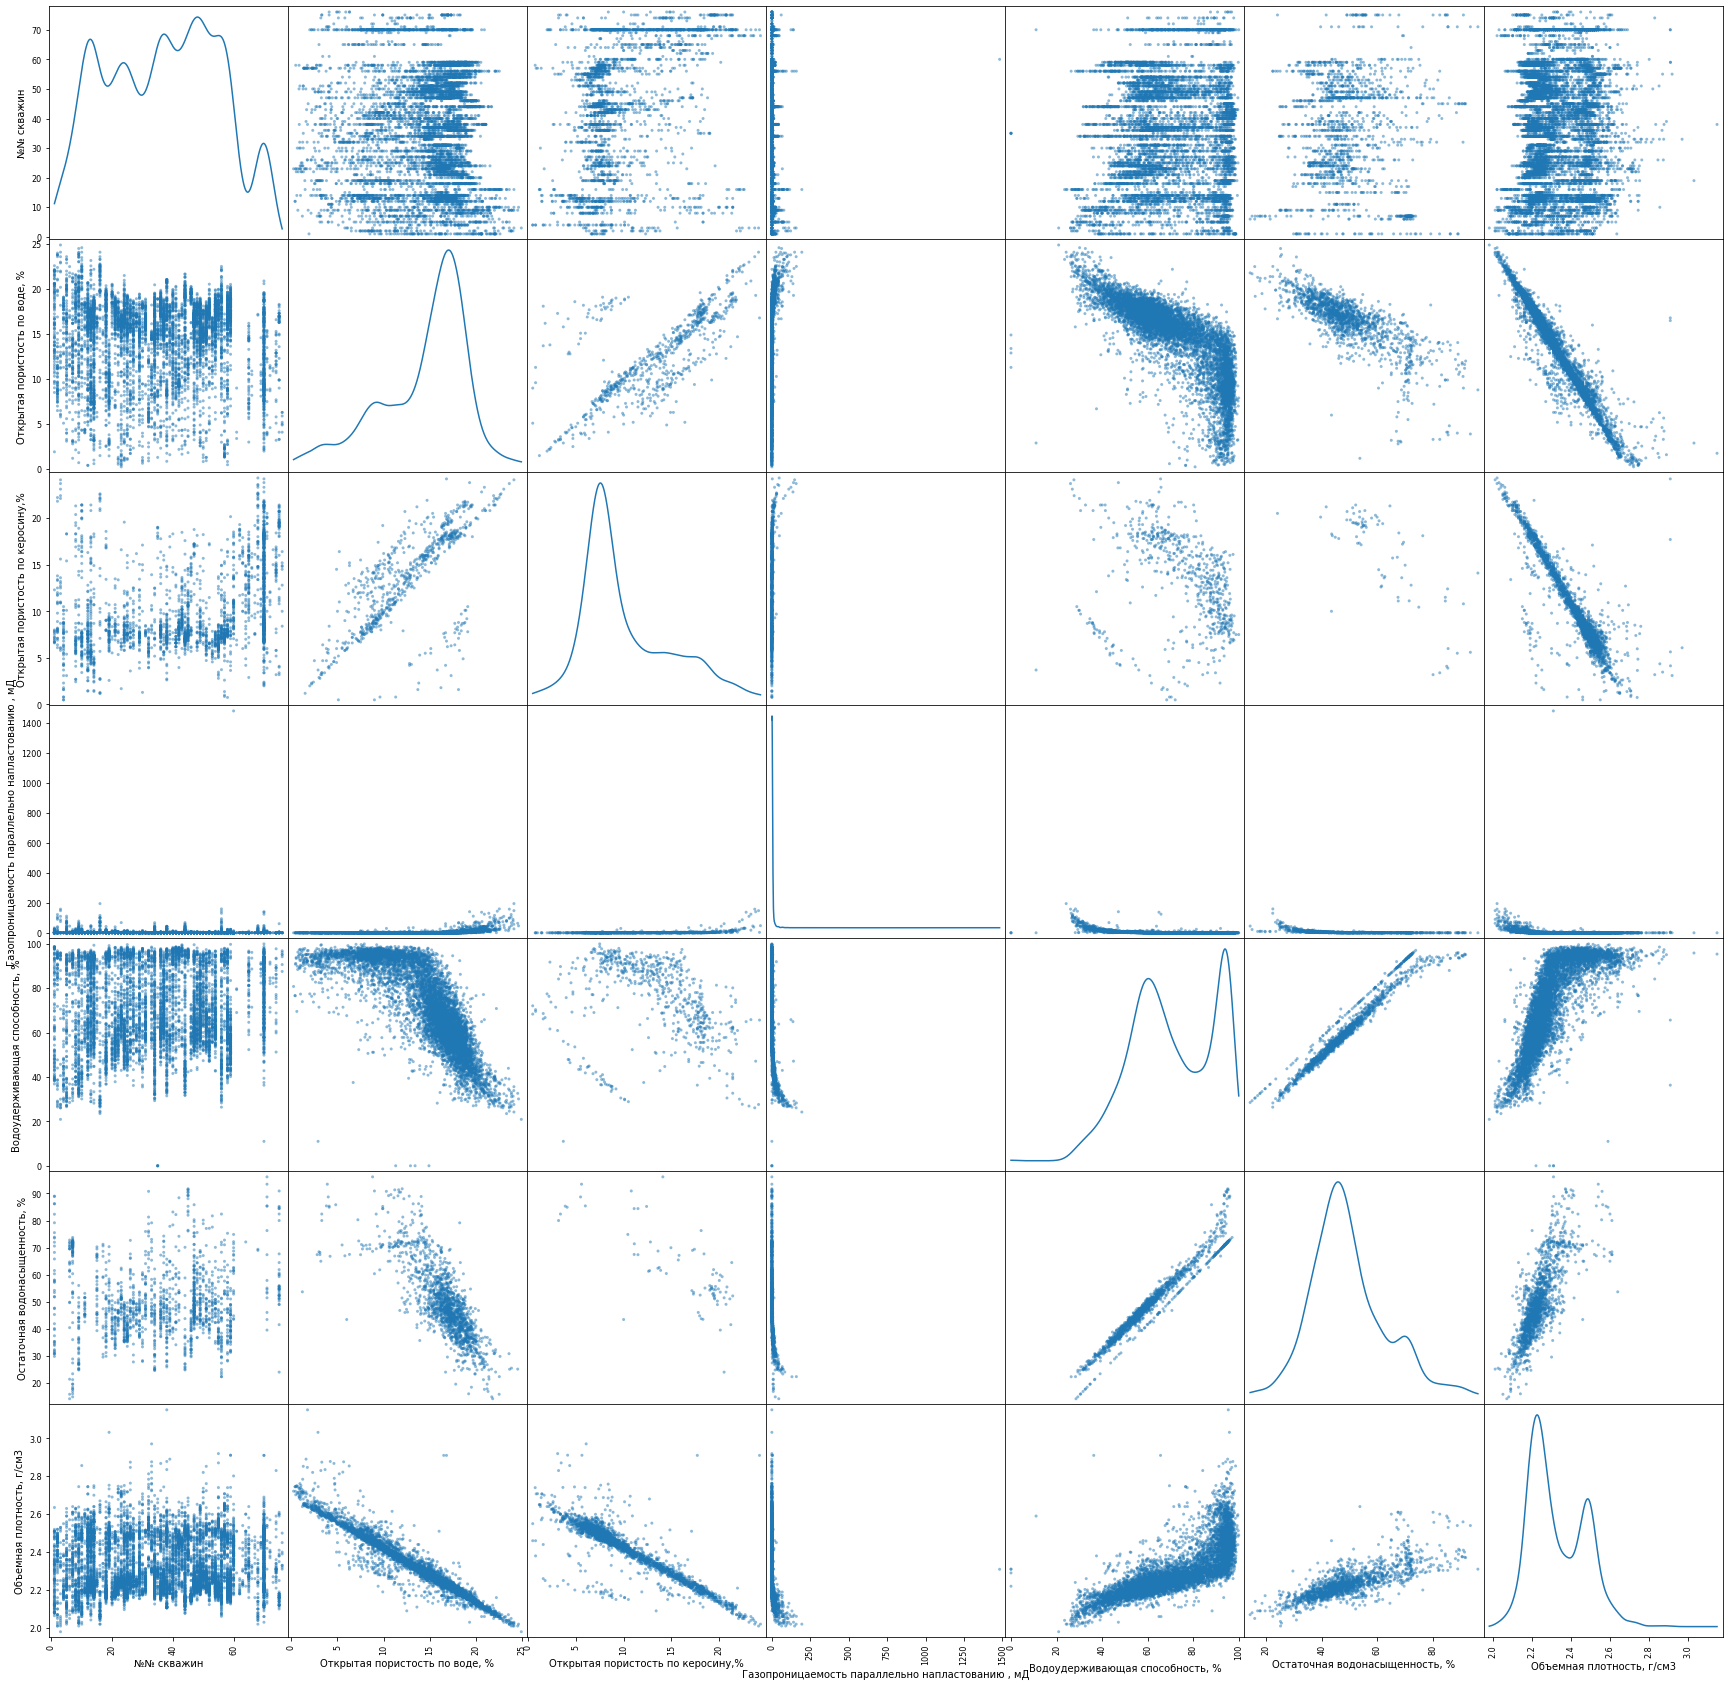

In [8]:
pd.plotting.scatter_matrix(main_data, diagonal="kde", figsize = (30,30))
plt.savefig('scatter_matrix.png', dpi = 1000)
plt.show()

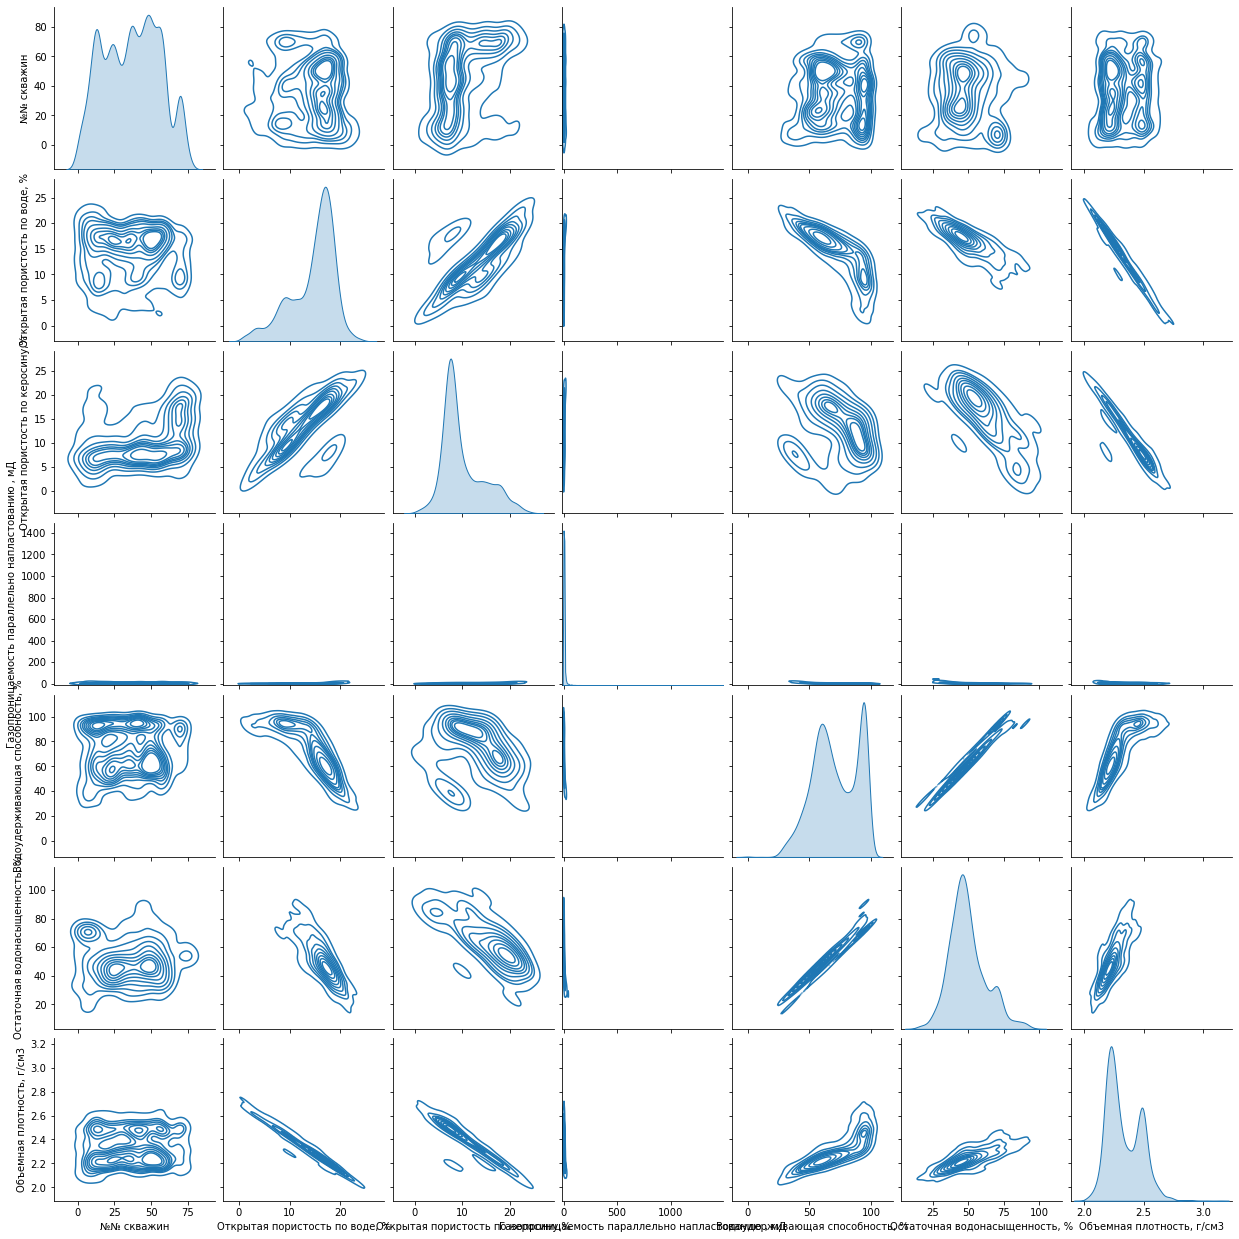

In [9]:
sns.pairplot(main_data, kind="kde", dropna=True )

In [10]:
data = main_data_n
data.cov()

,"Открытая пористость по воде, %","Открытая пористость по керосину,%","Водоудерживающая способность, %","Остаточная водонасыщенность, %","Объемная плотность, г/см3","Газопроницаемость параллельно напластованию , мД"
"Открытая пористость по воде, %",19.348809,16.615990,-62.953298,-28.468722,-0.554118,15.934602
"Открытая пористость по керосину,%",16.615990,19.606446,-27.203620,-51.965319,-0.525846,20.736241
"Водоудерживающая способность, %",-62.953298,-27.203620,328.138089,191.152672,1.841947,-88.458202
"Остаточная водонасыщенность, %",-28.468722,-51.965319,191.152672,170.635122,0.805954,-58.917128
"Объемная плотность, г/см3",-0.554118,-0.525846,1.841947,0.805954,0.020330,-0.485186
"Газопроницаемость параллельно напластованию , мД",15.934602,20.736241,-88.458202,-58.917128,-0.485186,404.180260


In [11]:
data.var()

Открытая пористость по воде, %                       19.348809
Открытая пористость по керосину,%                    19.606446
Водоудерживающая способность, %                     328.138089
Остаточная водонасыщенность, %                      170.635122
Объемная плотность, г/см3                             0.020330
Газопроницаемость параллельно напластованию , мД    404.180260
dtype: float64

In [12]:
data.mean()

Открытая пористость по воде, %                      14.543682
Открытая пористость по керосину,%                   10.023887
Водоудерживающая способность, %                     70.677862
Остаточная водонасыщенность, %                      49.361942
Объемная плотность, г/см3                            2.329378
Газопроницаемость параллельно напластованию , мД     3.225444
dtype: float64

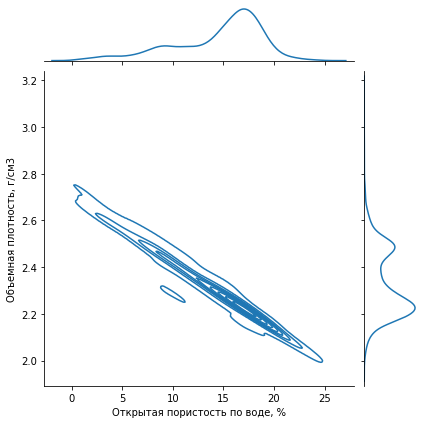

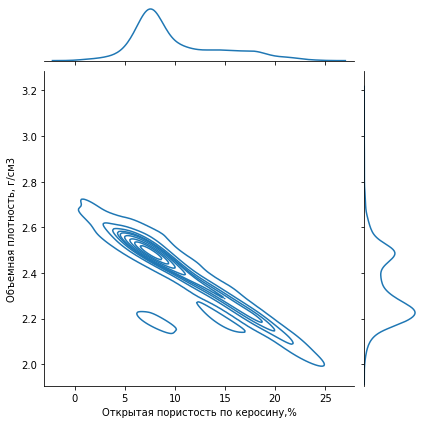

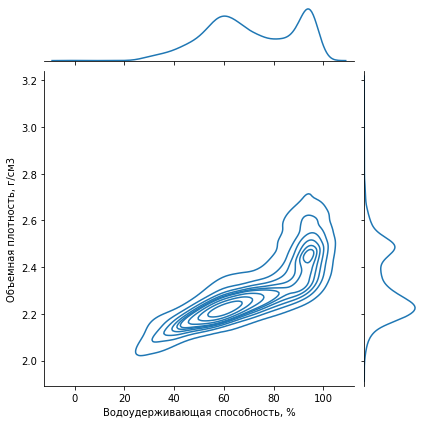

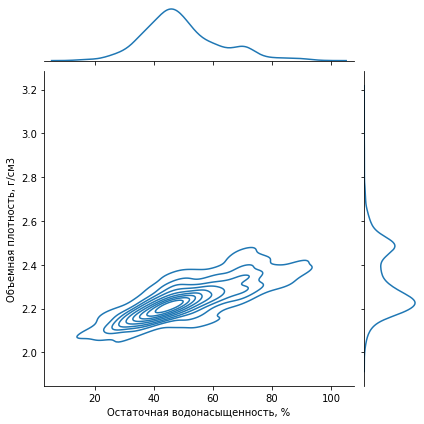

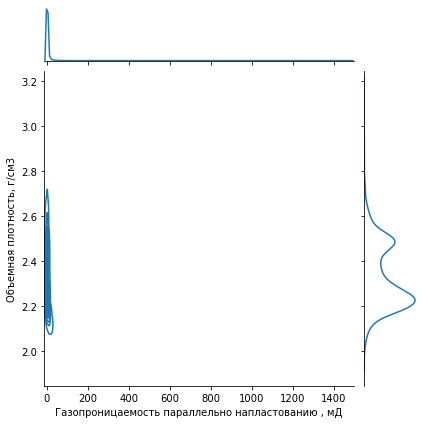

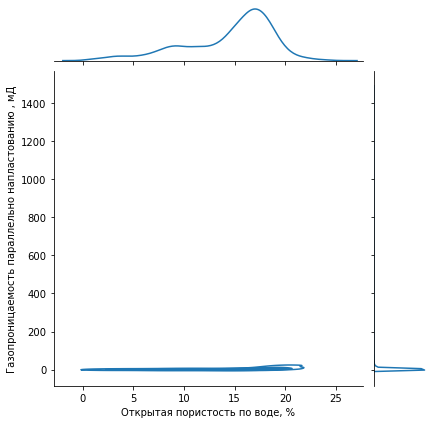

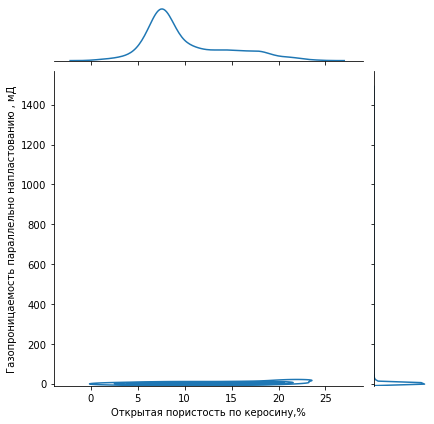

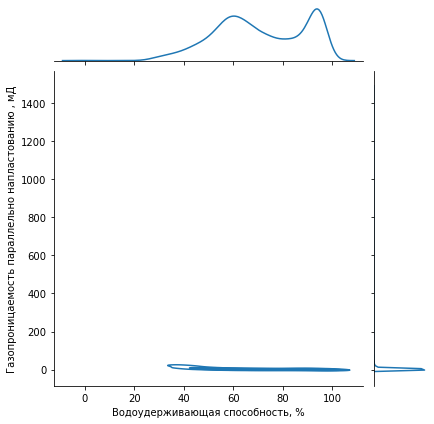

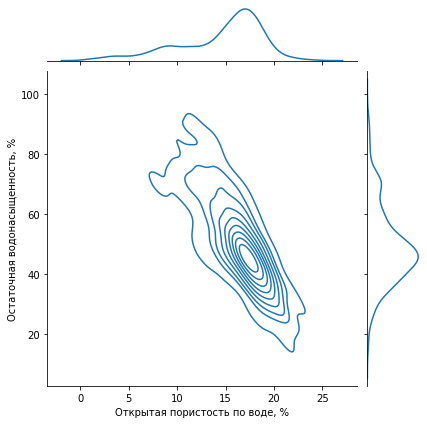

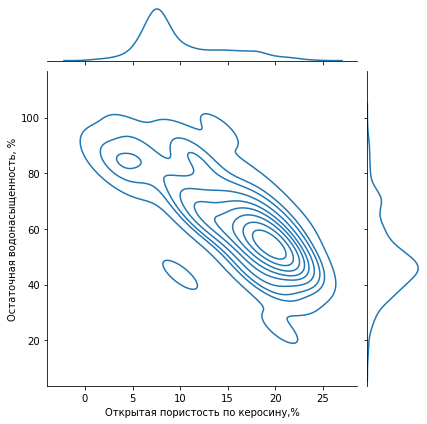

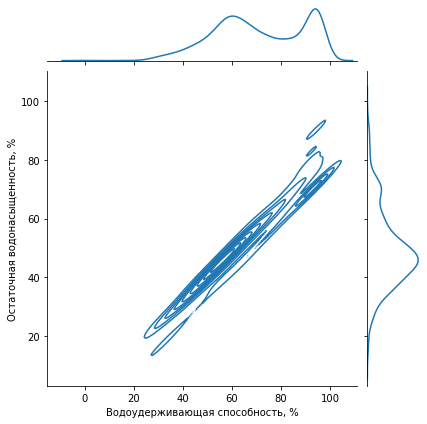

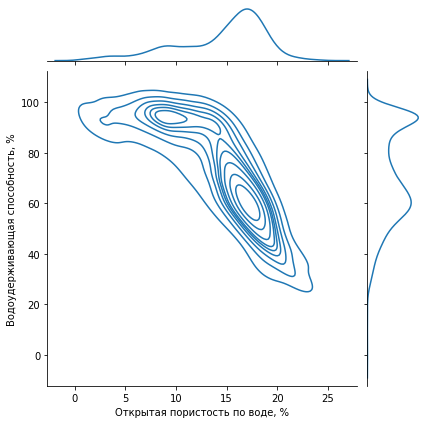

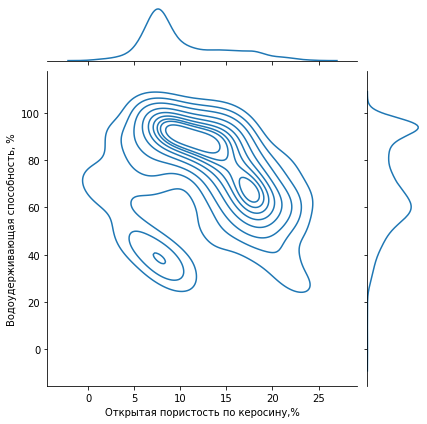

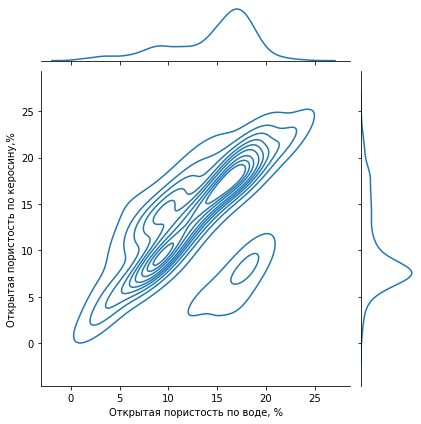

In [13]:
#print(data)
num1 = ['Открытая пористость по воде, %', 'Открытая пористость по керосину,%','Водоудерживающая способность, %', 'Остаточная водонасыщенность, %',  'Газопроницаемость параллельно напластованию , мД']
for i in num1: 
    sns.jointplot(data = main_data_n, x = i,  y = 'Объемная плотность, г/см3', kind="kde")
    plt.show()

num2 = ['Открытая пористость по воде, %', 'Открытая пористость по керосину,%','Водоудерживающая способность, %']   
for i in num2: 
    sns.jointplot(data = main_data_n, x = i,  y = 'Газопроницаемость параллельно напластованию , мД', kind="kde")
    plt.show()
    
num3 = ['Открытая пористость по воде, %', 'Открытая пористость по керосину,%','Водоудерживающая способность, %']
for i in num3:          
    sns.jointplot(data = main_data_n, x = i, y = 'Остаточная водонасыщенность, %', kind="kde")
    plt.show()

num4 = ['Открытая пористость по воде, %', 'Открытая пористость по керосину,%']   
for i in num4:          
    sns.jointplot(data = main_data_n, x = i, y = 'Водоудерживающая способность, %', kind="kde")
    plt.show()  
    
sns.jointplot(data = main_data_n, x = 'Открытая пористость по воде, %', y = 'Открытая пористость по керосину,%', kind="kde")
plt.show()

In [15]:
discrete = main_data_d.columns
numerical = main_data_n.columns


for i in main_data_d['Пласт'].unique():
    for n in numerical:
        mean = np.mean(main_data[main_data['Пласт']==i][n])
        var = np.var(main_data[main_data['Пласт']==i][n])

    
        print('Мат ожидание столбца %s' % n, 'по условной выборке %s' % i , '= %s'  % mean)
        print('Дисперсия столбца %s' % n, 'по условной выборке Пласт %s' % i , '= %s'  % var)

Мат ожидание столбца Открытая пористость по воде, % по условной выборке MО10-0 = nan
Дисперсия столбца Открытая пористость по воде, % по условной выборке Пласт MО10-0 = nan
Мат ожидание столбца Открытая пористость по керосину,% по условной выборке MО10-0 = 7.425
Дисперсия столбца Открытая пористость по керосину,% по условной выборке Пласт MО10-0 = 0.11187499999999997
Мат ожидание столбца Водоудерживающая способность, % по условной выборке MО10-0 = nan
Дисперсия столбца Водоудерживающая способность, % по условной выборке Пласт MО10-0 = nan
Мат ожидание столбца Остаточная водонасыщенность, % по условной выборке MО10-0 = nan
Дисперсия столбца Остаточная водонасыщенность, % по условной выборке Пласт MО10-0 = nan
Мат ожидание столбца Объемная плотность, г/см3 по условной выборке MО10-0 = 2.49
Дисперсия столбца Объемная плотность, г/см3 по условной выборке Пласт MО10-0 = 0.00014999999999999804
Мат ожидание столбца Газопроницаемость параллельно напластованию , мД по условной выборке MО10-0 = 

Мат ожидание столбца Газопроницаемость параллельно напластованию , мД по условной выборке MО10.4 = 1.471604788067475
Дисперсия столбца Газопроницаемость параллельно напластованию , мД по условной выборке Пласт MО10.4 = 9.926037840481438
Мат ожидание столбца Открытая пористость по воде, % по условной выборке MО11.1 = 16.322295671134523
Дисперсия столбца Открытая пористость по воде, % по условной выборке Пласт MО11.1 = 27.532851700274612
Мат ожидание столбца Открытая пористость по керосину,% по условной выборке MО11.1 = 9.836206582175633
Дисперсия столбца Открытая пористость по керосину,% по условной выборке Пласт MО11.1 = 12.788800729148607
Мат ожидание столбца Водоудерживающая способность, % по условной выборке MО11.1 = 69.75680184705121
Дисперсия столбца Водоудерживающая способность, % по условной выборке Пласт MО11.1 = 277.7050250438907
Мат ожидание столбца Остаточная водонасыщенность, % по условной выборке MО11.1 = 38.0775192713607
Дисперсия столбца Остаточная водонасыщенность, % по

Мат ожидание столбца Водоудерживающая способность, % по условной выборке MО10.1.1 = 59.75984014327234
Дисперсия столбца Водоудерживающая способность, % по условной выборке Пласт MО10.1.1 = 233.74310093025986
Мат ожидание столбца Остаточная водонасыщенность, % по условной выборке MО10.1.1 = nan
Дисперсия столбца Остаточная водонасыщенность, % по условной выборке Пласт MО10.1.1 = nan
Мат ожидание столбца Объемная плотность, г/см3 по условной выборке MО10.1.1 = 2.346289051958101
Дисперсия столбца Объемная плотность, г/см3 по условной выборке Пласт MО10.1.1 = 0.021170241092724248
Мат ожидание столбца Газопроницаемость параллельно напластованию , мД по условной выборке MО10.1.1 = 6.2008289166911545
Дисперсия столбца Газопроницаемость параллельно напластованию , мД по условной выборке Пласт MО10.1.1 = 97.77134654529067
Мат ожидание столбца Открытая пористость по воде, % по условной выборке MО12.2.2-3 = nan
Дисперсия столбца Открытая пористость по воде, % по условной выборке Пласт MО12.2.2-3 

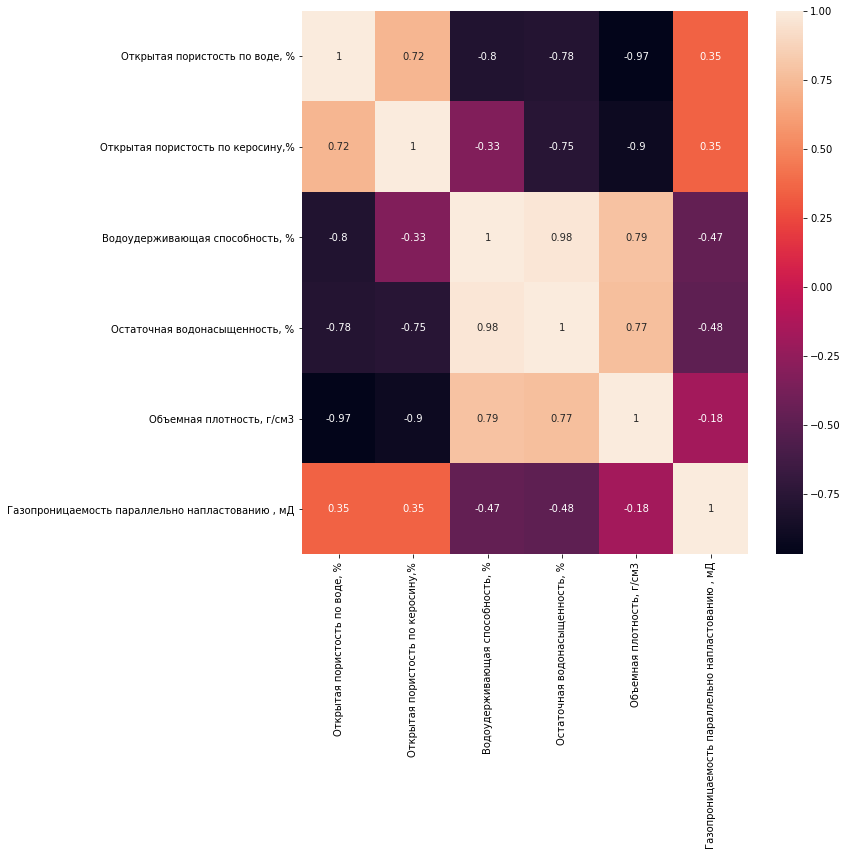

In [16]:
#HeatMap
plt.figure(figsize=(10, 10))
sns.heatmap(main_data_n.corr(), annot=True)
plt.show()

In [17]:
print(main_data_n.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10310 entries, 0 to 10309
Data columns (total 6 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Открытая пористость по воде, %                    7865 non-null   float64
 1   Открытая пористость по керосину,%                 2861 non-null   float64
 2   Водоудерживающая способность, %                   7470 non-null   float64
 3   Остаточная водонасыщенность, %                    1590 non-null   float64
 4   Объемная плотность, г/см3                         10121 non-null  float64
 5   Газопроницаемость параллельно напластованию , мД  7148 non-null   float64
dtypes: float64(6)
memory usage: 563.8 KB
None


In [18]:
df = main_data_n[['Открытая пористость по воде, %',
                      'Водоудерживающая способность, %', 'Остаточная водонасыщенность, %',
                      'Объемная плотность, г/см3', 'Газопроницаемость параллельно напластованию , мД']]
df = df.dropna()

In [19]:
numerical = df.columns
numerical

Index(['Открытая пористость по воде, %', 'Водоудерживающая способность, %',
       'Остаточная водонасыщенность, %', 'Объемная плотность, г/см3',
       'Газопроницаемость параллельно напластованию , мД'],
      dtype='object')

In [20]:
# Confidence interval for the correlation coefficient
for i in numerical:
    for j in numerical:
        if j==i:
            continue
        else:
            x = df[i].apply(lambda x: float(x))
            y = df[j].apply(lambda x: float(x))
            #print(len(x), len(y))

            r, p = stats.pearsonr(x,y)
            r_z = np.arctanh(r) # matches Fisher transform
            # Corresponding standard deviation
            se = 1/np.sqrt(x.size-3)
            alpha = 0.05
            z = scipy.stats.norm.ppf(1-alpha/2)
            lo_z = r_z-z*se
            hi_z = r_z+z*se
            
            lo_z_r = np.tanh(lo_z)
            hi_z_r = np.tanh(hi_z)

            print('Correlation coefficient ({}, {}) = {}'.format(i,j,r))
            print('Confidence interval for the correlation coefficient ', lo_z_r, hi_z_r)
            print('p-value = {}\n'.format(p))

Correlation coefficient (Открытая пористость по воде, %, Водоудерживающая способность, %) = -0.8022753996556211
Confidence interval for the correlation coefficient  -0.8200343211441327 -0.7829730038240822
p-value = 2.29e-321

Correlation coefficient (Открытая пористость по воде, %, Остаточная водонасыщенность, %) = -0.7780103699927603
Confidence interval for the correlation coefficient  -0.7977040642269353 -0.7566589927373187
p-value = 9.46264749436034e-290

Correlation coefficient (Открытая пористость по воде, %, Объемная плотность, г/см3) = -0.9813986192143312
Confidence interval for the correlation coefficient  -0.9832191255232609 -0.979382664884779
p-value = 0.0

Correlation coefficient (Открытая пористость по воде, %, Газопроницаемость параллельно напластованию , мД) = 0.4453118111060191
Confidence interval for the correlation coefficient  0.4027105243144364 0.4859880258480979
p-value = 2.1412961086139578e-70

Correlation coefficient (Водоудерживающая способность, %, Открытая пори

In [21]:
data_pred = data_raw[['Водоудерживающая способность, %', 'Открытая пористость по воде, %', 'Объемная плотность, г/см3','Газопроницаемость параллельно напластованию , мД']].dropna()

In [22]:
X = data_pred[['Открытая пористость по воде, %', 'Объемная плотность, г/см3',
               'Газопроницаемость параллельно напластованию , мД']] # independent variables data
y = data_pred['Водоудерживающая способность, %']  # dependednt variable data

In [23]:
#Данные для настройки модели
y_train = y[200:]
X_train = X[200:]
#Данные для проверки точности модели
X_test = X[:200]
y_test = y[:200]

<AxesSubplot:>

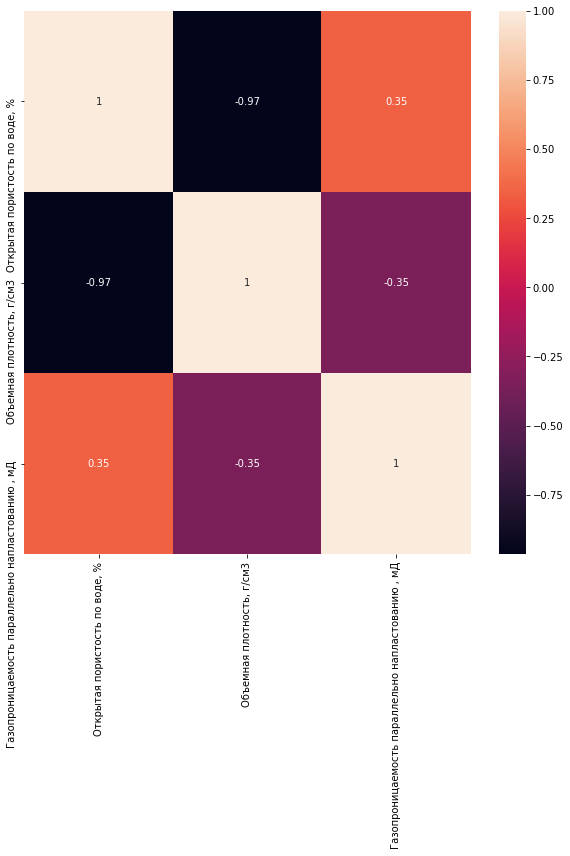

In [24]:
#Оценка многомерной корреляции для предикторов, целевая переменная это Permeability vertical and horizontal
plt.figure(figsize=(10, 10))
sns.heatmap(X_train.corr(), annot=True)

<h5>Задача - предсказать водоудерживающую способность по данным пористости по воде, 
объемной плотности, газопроницаемости<h5>


In [25]:
LR = LinearRegression().fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)
LR.score(X_test, y_test)

0.7281848780012397

In [30]:
def _mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [33]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Calculation of model metrics
mae_LR = mean_absolute_error(y_test, y_pred_LR)
mse_LR = mean_squared_error(y_test, y_pred_LR)
print('Mean absolute error = ', mae_LR)
print('Mean squared error = ', mse_LR)
mape_LR = _mean_absolute_percentage_error(y_test, y_pred_LR)
print('Mean absolute percentage error = ', mape_LR)

Mean absolute error =  10.556852163645017
Mean squared error =  179.3422461869497
Mean absolute percentage error =  20.081241067089568


In [35]:
from sklearn.linear_model import Ridge

rclf = Ridge(alpha=1.0)
rclf.fit(X_train, y_train)
rclf.score(X_test, y_test)

0.727826796956231

In [38]:
from sklearn.linear_model import Lasso

clf = Lasso(alpha=0.1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7253145224072163

In [39]:
y_pred_ridge = rclf.predict(X_test)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print('Mean absolute error with lasso = ', mae_ridge)
print('Mean squared error with lasso = ', mse_ridge)
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge)
print('Mean absolute percentage error = ', mape_ridge)

Mean absolute error with lasso =  10.559829960876518
Mean squared error with lasso =  179.57850625392686
Mean absolute percentage error =  20.099102253998115


In [40]:
y_pred_lasso = clf.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print('Mean absolute error with lasso = ', mae_lasso)
print('Mean squared error with lasso = ', mse_lasso)
mape_lasso = mean_absolute_percentage_error(y_test, y_pred_lasso)
print('Mean absolute percentage error = ', mape_lasso)

Mean absolute error with lasso =  10.585679440545903
Mean squared error with lasso =  181.23609232693664
Mean absolute percentage error =  20.22859420351354


Среднее остатка = -3.17861519381988
ShapiroResult(statistic=0.9866823554039001, pvalue=0.05710018053650856)


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Водоудерживающая способность, %', ylabel='Density'>

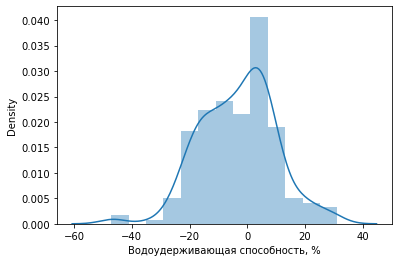

In [44]:
#Распределение остатков
balance = y_pred_LR - y_test
print('Среднее остатка =', balance.mean())
print(scipy.stats.shapiro(balance))
sns.distplot(balance, kde = True)